# Install required libraries

In [3]:
# install pycaret
# !pip install pycaret

**Go to Runtime --> Restart Runtime. If you do not restart you will get error later in this notebook.**

# Dataset

In [4]:
from pycaret.datasets import get_data
data = get_data('public_health')

,Country Name,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,Arab World,2.004868,2.014602,2.071309,2.177712,2.331000,2.333596,2.588751,2.540238,2.450415,...,2.134281,2.133038,2.166872,2.101233,2.830067,2.489631,2.539570,2.711262,2.895427,3.073161
1,Caribbean small states,2.801518,2.856684,2.997157,2.989451,2.767858,2.826752,2.679969,2.888693,2.740593,...,2.629580,2.650900,2.790665,2.822913,3.408651,3.264064,3.087653,3.314303,3.318432,3.260012
2,Central Europe and the Baltics,4.678528,4.753209,4.604574,4.499988,4.679082,4.539711,4.666272,4.900196,5.100249,...,4.970861,4.841450,4.809057,5.054785,5.394921,5.284380,5.096212,5.041317,5.029266,5.017717
3,Early-demographic dividend,2.203164,2.156632,2.227311,2.364100,2.454394,2.450555,2.527081,2.347702,2.363263,...,2.337347,2.369884,2.385251,2.405126,2.701260,2.507131,2.495491,2.497340,2.586701,2.665603
4,East Asia & Pacific,4.429090,4.203152,4.244351,4.453984,4.626920,4.688849,4.684790,4.613537,4.635098,...,4.566215,4.367146,4.297394,4.434848,4.865241,4.775817,4.871727,4.866869,4.643221,4.571448


In [5]:
data.shape

(224, 21)

There is a dataset of 224 entities (some of them are regions and some are countries). It contains public healthcare spending as % of GDP from year 1995 - 2014.

Source: https://data.worldbank.org/indicator/SH.XPD.CHEX.GD.ZS

# Exploratory Data Analysis

In [6]:
# check shape
data.shape

(224, 21)

In [7]:
# check missing values
data.isnull().sum()

Country Name    0
1995            0
1996            0
1997            0
1998            0
1999            0
2000            0
2001            0
2002            0
2003            0
2004            0
2005            0
2006            0
2007            0
2008            0
2009            0
2010            0
2011            0
2012            0
2013            0
2014            0
dtype: int64

In [8]:
# set country name to index
data.set_index('Country Name', inplace=True, drop=True)

In [9]:
data.head(50)

,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
Country Name,,,,,,,,,,,,,,,,,,,,
Arab World,2.004868,2.014602,2.071309,2.177712,2.331000,2.333596,2.588751,2.540238,2.450415,2.314914,2.134281,2.133038,2.166872,2.101233,2.830067,2.489631,2.539570,2.711262,2.895427,3.073161
Caribbean small states,2.801518,2.856684,2.997157,2.989451,2.767858,2.826752,2.679969,2.888693,2.740593,2.845971,2.629580,2.650900,2.790665,2.822913,3.408651,3.264064,3.087653,3.314303,3.318432,3.260012
Central Europe and the Baltics,4.678528,4.753209,4.604574,4.499988,4.679082,4.539711,4.666272,4.900196,5.100249,4.913629,4.970861,4.841450,4.809057,5.054785,5.394921,5.284380,5.096212,5.041317,5.029266,5.017717
Early-demographic dividend,2.203164,2.156632,2.227311,2.364100,2.454394,2.450555,2.527081,2.347702,2.363263,2.346824,2.337347,2.369884,2.385251,2.405126,2.701260,2.507131,2.495491,2.497340,2.586701,2.665603
East Asia & Pacific,4.429090,4.203152,4.244351,4.453984,4.626920,4.688849,4.684790,4.613537,4.635098,4.626696,4.566215,4.367146,4.297394,4.434848,4.865241,4.775817,4.871727,4.866869,4.643221,4.571448
East Asia & Pacific (excluding high income),1.615852,1.640251,1.678322,1.764603,1.754013,1.689185,1.626887,1.736856,1.808637,1.815667,1.796320,1.875267,2.076666,2.256214,2.574994,2.538430,2.669787,2.811490,2.881805,2.975051
East Asia & Pacific (IDA & IBRD countries),1.615852,1.640251,1.678322,1.764603,1.754013,1.689185,1.626887,1.736856,1.808637,1.815667,1.796320,1.875267,2.076666,2.256214,2.574994,2.538430,2.669787,2.811490,2.881805,2.975051
Euro area,6.716642,6.819912,6.775234,6.713452,6.707802,6.725721,6.824762,6.970491,7.100570,7.082379,7.243411,7.275137,7.183726,7.419703,8.060334,7.985295,7.851060,7.904805,7.961558,8.001480
Europe & Central Asia,6.258718,6.339841,6.249748,6.194955,6.269453,6.207591,6.357421,6.543767,6.680231,6.643570,6.709228,6.691296,6.590410,6.775062,7.489585,7.256678,7.096764,7.107059,7.143519,7.184030


Notice that all the entries towards the top are not countries. There are regions like `Arab World` or category like `Upper middle income`. Let us visualize some regions and then we will only keep countries in this dataset before we begin Clustering.

<Axes: >

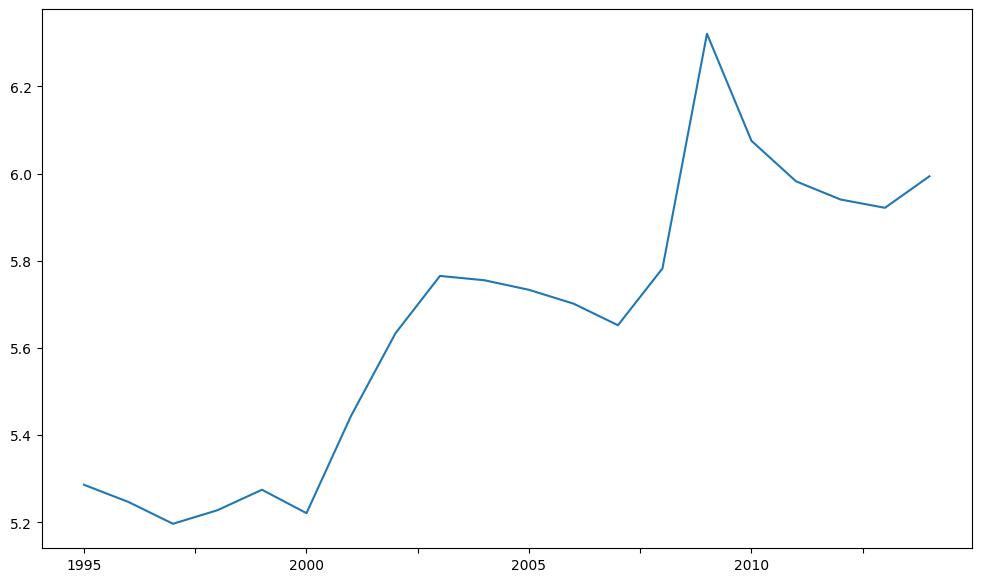

In [10]:
# public health as % of GDP for entire world
data.loc['World'].plot(figsize=(12,7))

<Axes: >

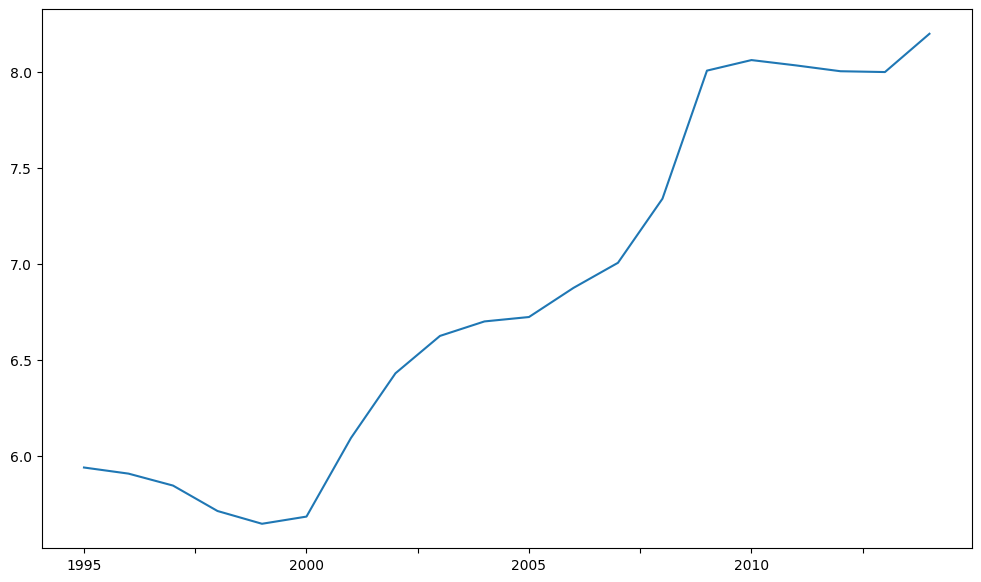

In [11]:
# public health as % of GDP for North America
data.loc['North America'].plot(figsize=(12,7))

<Axes: >

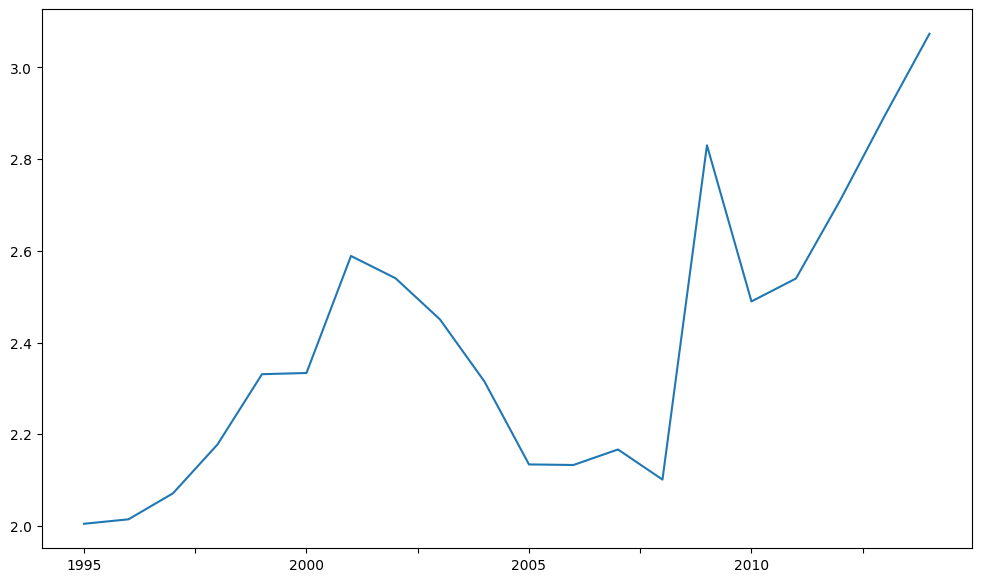

In [12]:
# public health as % of GDP for Arab World
data.loc['Arab World'].plot(figsize=(12,7))

<Axes: >

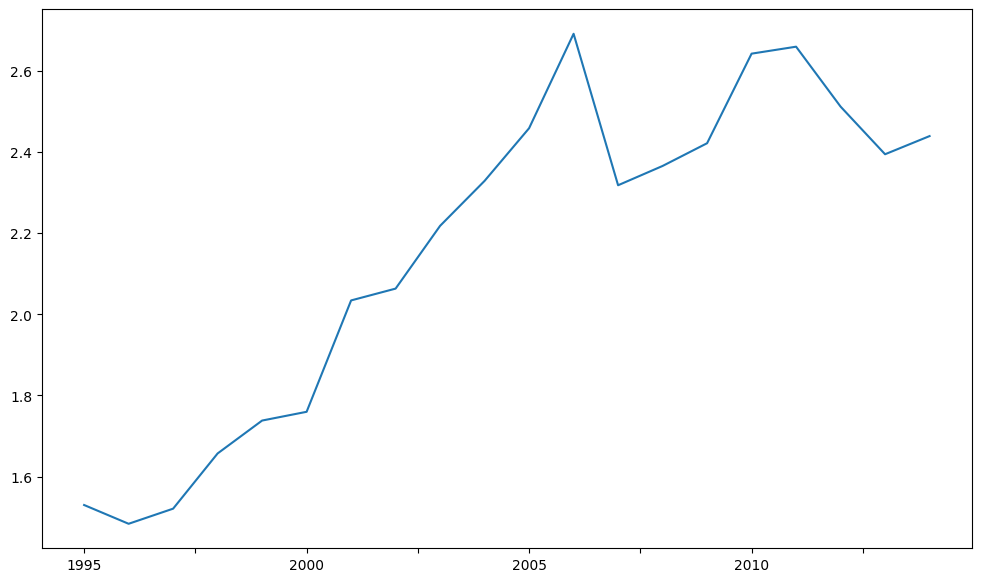

In [13]:
# public health as % of GDP for Low Income
data.loc['Low income'].plot(figsize=(12,7))

<Axes: >

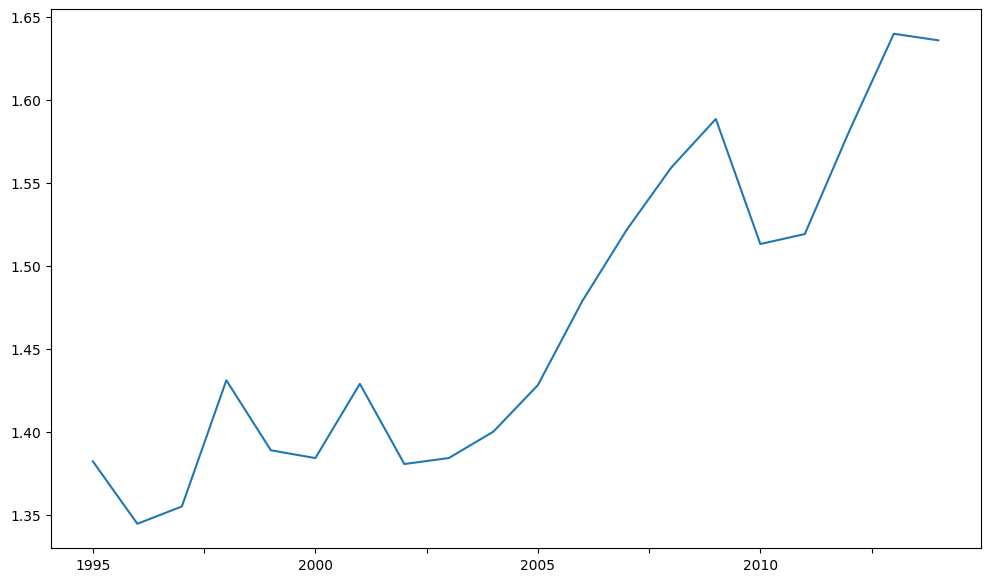

In [14]:
# public health as % of GDP for Lower middle income
data.loc['Lower middle income'].plot(figsize=(12,7))

<Axes: >

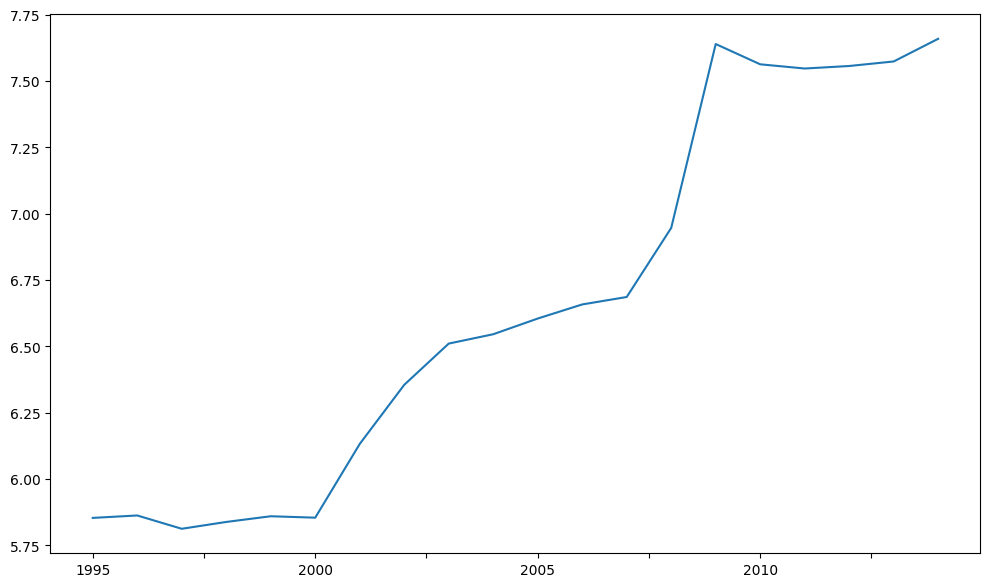

In [15]:
# public health as % of GDP for High income
data.loc['High income'].plot(figsize=(12,7))

Do you notice any differences? Comment on it.

In [16]:
# remove the first 40 rows as they contain regions or categories.
# we will only work countries now.
data = data.iloc[40:]
data.head()

,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
Country Name,,,,,,,,,,,,,,,,,,,,
Albania,1.713004,1.746198,2.024509,2.095128,2.510171,2.258418,2.292224,2.256326,2.252104,2.679405,2.706455,2.575136,2.629171,2.693898,2.833576,2.476568,2.849171,2.735704,2.835984,2.936373
Algeria,2.673594,2.502183,2.553366,2.527980,2.383331,2.558561,2.971717,2.852274,2.802237,2.566248,2.280233,2.334851,2.705571,3.062804,3.837966,3.593209,3.775729,4.520251,5.188359,5.244146
Andorra,3.982683,4.235647,4.297070,5.737580,3.933466,3.976548,3.979764,4.109589,3.946180,3.916260,3.459709,3.566122,4.586323,4.825071,5.037537,6.242027,4.926289,5.747040,9.692357,6.341446
Angola,4.659118,1.739782,2.019219,1.414705,2.131798,1.677216,2.812403,1.685218,2.044369,2.407841,2.024646,3.022435,2.213764,2.716334,2.663917,2.061255,2.155094,2.137317,3.080408,2.124912
Antigua and Barbuda,2.746345,2.505800,2.597403,2.672065,2.744200,2.787805,2.949760,2.950231,2.950013,2.679794,2.950099,2.950106,2.950000,3.343031,3.343900,3.893547,3.891040,3.652333,3.592597,3.784611


In [17]:
# notice the difference between shape now vs. previously on raw data.
data.shape

(184, 20)

# Modeling

In [18]:
# reseting index of data
data.reset_index(inplace=True)
data.head()

,Country Name,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,Albania,1.713004,1.746198,2.024509,2.095128,2.510171,2.258418,2.292224,2.256326,2.252104,...,2.706455,2.575136,2.629171,2.693898,2.833576,2.476568,2.849171,2.735704,2.835984,2.936373
1,Algeria,2.673594,2.502183,2.553366,2.527980,2.383331,2.558561,2.971717,2.852274,2.802237,...,2.280233,2.334851,2.705571,3.062804,3.837966,3.593209,3.775729,4.520251,5.188359,5.244146
2,Andorra,3.982683,4.235647,4.297070,5.737580,3.933466,3.976548,3.979764,4.109589,3.946180,...,3.459709,3.566122,4.586323,4.825071,5.037537,6.242027,4.926289,5.747040,9.692357,6.341446
3,Angola,4.659118,1.739782,2.019219,1.414705,2.131798,1.677216,2.812403,1.685218,2.044369,...,2.024646,3.022435,2.213764,2.716334,2.663917,2.061255,2.155094,2.137317,3.080408,2.124912
4,Antigua and Barbuda,2.746345,2.505800,2.597403,2.672065,2.744200,2.787805,2.949760,2.950231,2.950013,...,2.950099,2.950106,2.950000,3.343031,3.343900,3.893547,3.891040,3.652333,3.592597,3.784611


In [19]:
from pycaret.clustering import *
s = setup(data, ignore_features = ['Country Name'], session_id = 123)

,Description,Value
0,Session id,123
1,Original data shape,"(184, 21)"
2,Transformed data shape,"(184, 20)"
3,Ignore features,1
4,Numeric features,20
5,Preprocess,True
6,Imputation type,simple
7,Numeric imputation,mean
8,Categorical imputation,mode
9,CPU Jobs,-1


In [20]:
kmeans = create_model('kmeans', num_clusters = 4)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4348,253.5978,0.7596,0,0,0


# Model Analysis

In [21]:
# clusters are represented by color. hover over the dots to see country names
plot_model(kmeans, plot = 'cluster')

In [22]:
# same plot as above in 3d
plot_model(kmeans, plot = 'tsne')

In [23]:
# number of countries by cluster
plot_model(kmeans, plot = 'distribution')

In [24]:
# assign results of kmeans model into dataframe
# notice the last column of this frame. It is a result of Kmeans algorithm.
kmeans_results = assign_model(kmeans)
kmeans_results

,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,Cluster
0,1.713004,1.746198,2.024509,2.095128,2.510171,2.258418,2.292224,2.256326,2.252104,2.679405,...,2.575136,2.629171,2.693898,2.833576,2.476568,2.849171,2.735704,2.835984,2.936373,Cluster 1
1,2.673594,2.502182,2.553366,2.527980,2.383331,2.558561,2.971717,2.852274,2.802237,2.566248,...,2.334851,2.705571,3.062804,3.837966,3.593209,3.775729,4.520251,5.188359,5.244145,Cluster 0
2,3.982683,4.235647,4.297071,5.737580,3.933466,3.976548,3.979764,4.109589,3.946180,3.916260,...,3.566122,4.586323,4.825071,5.037537,6.242027,4.926289,5.747040,9.692357,6.341446,Cluster 0
3,4.659118,1.739782,2.019219,1.414705,2.131798,1.677216,2.812403,1.685217,2.044369,2.407840,...,3.022435,2.213764,2.716334,2.663917,2.061255,2.155094,2.137316,3.080408,2.124912,Cluster 1
4,2.746345,2.505800,2.597403,2.672065,2.744200,2.787806,2.949760,2.950232,2.950013,2.679794,...,2.950106,2.950000,3.343031,3.343899,3.893547,3.891040,3.652333,3.592597,3.784611,Cluster 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,2.139305,1.749747,2.296830,3.038570,2.639953,2.736929,2.788550,2.907660,3.418927,3.524657,...,3.427445,3.161682,3.179892,3.402323,4.182598,3.320178,3.167396,3.391475,4.510749,Cluster 1
180,1.803152,1.482415,1.387316,1.466016,1.833422,2.163059,2.340757,2.151332,2.079300,2.158141,...,2.221770,2.464781,1.230489,2.496312,2.088239,2.335451,1.675638,1.542859,1.542766,Cluster 1
181,1.757863,1.632232,1.604611,1.731438,1.717060,1.513863,1.627561,1.447736,1.551822,1.393650,...,1.944867,2.563552,2.131963,2.569187,2.960967,2.805002,3.722124,3.796360,3.820019,Cluster 1
182,1.358740,1.644501,1.898410,2.324038,2.127391,2.235286,2.294181,2.142648,2.181731,1.854331,...,1.521602,1.462790,1.565018,1.336698,1.299131,1.350447,1.571628,1.410010,1.271871,Cluster 1


In [25]:
# check countries in Cluster 2. There are only 3 countries in this cluster.
# what do you notice here?
kmeans_results[kmeans_results['Cluster'] == 'Cluster 2']

,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,Cluster
7,4.775233,4.856308,5.016476,5.084648,5.326927,5.399512,5.420999,5.620660,5.506127,5.724899,...,5.660887,5.765876,5.927631,6.186556,6.127334,6.315378,6.285633,6.274917,6.316593,Cluster 2
8,7.137100,7.096257,7.356729,7.478720,7.648252,7.536366,7.503314,7.606508,7.736480,7.791337,...,7.737933,7.775803,7.995857,8.466129,8.400007,8.213675,8.417190,8.370613,8.725026,Cluster 2
15,5.845321,6.184038,5.853458,5.899438,6.023602,6.058374,6.252815,6.244509,6.918097,7.127857,...,6.962370,6.952937,7.396754,8.043822,7.896703,8.006738,8.186299,8.226719,8.249990,Cluster 2
30,6.313500,6.112419,6.033112,6.228971,6.107698,6.098427,6.364905,6.514306,6.694243,6.719902,...,6.788408,6.893501,7.063454,7.914158,7.884397,7.676793,7.651145,7.575665,7.411932,Cluster 2
39,4.981965,5.065507,4.838993,5.637174,5.362923,5.612425,5.485507,6.283476,6.450275,5.653259,...,5.397314,5.627837,6.261311,7.022190,7.092617,7.149714,7.000227,6.914441,6.767601,Cluster 2
41,5.830670,6.135022,4.893761,5.733092,6.326324,6.602275,5.964355,4.955064,5.242817,5.314159,...,5.984642,6.477623,6.538723,7.006867,7.064964,6.255412,6.363207,6.403029,6.388288,Cluster 2
42,4.648496,4.756708,4.986951,5.226020,5.474999,5.509534,5.670491,5.724850,5.648789,5.468185,...,7.081250,9.883198,10.293358,11.283919,9.703828,10.071011,8.088255,8.962295,10.573663,Cluster 2
44,6.084043,5.812946,5.779225,5.803851,5.744610,5.702535,5.764903,6.149835,6.404474,6.154497,...,5.805409,5.556626,5.628785,6.569654,6.224936,6.314733,6.341765,6.313088,6.264977,Cluster 2
45,6.705344,6.767538,6.706312,6.694654,7.517019,7.295186,7.660539,7.885050,8.039901,8.152819,...,8.399549,8.429011,8.621215,9.756125,9.433818,9.268852,9.419661,9.593210,9.158734,Cluster 2
57,5.627187,5.753536,5.563132,5.326593,5.268778,5.144464,5.343613,5.657160,5.932232,6.017266,...,6.279189,6.031731,6.253822,6.896823,6.738832,6.753551,7.040840,7.204017,7.289814,Cluster 2


In [26]:
# check all countries in Cluster 1
kmeans_results[kmeans_results['Cluster'] == 'Cluster 1']

,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,Cluster
0,1.713004,1.746198,2.024509,2.095128,2.510171,2.258418,2.292224,2.256326,2.252104,2.679405,...,2.575136,2.629171,2.693898,2.833576,2.476568,2.849171,2.735704,2.835984,2.936373,Cluster 1
3,4.659118,1.739782,2.019219,1.414705,2.131798,1.677216,2.812403,1.685217,2.044369,2.407840,...,3.022435,2.213764,2.716334,2.663917,2.061255,2.155094,2.137316,3.080408,2.124912,Cluster 1
4,2.746345,2.505800,2.597403,2.672065,2.744200,2.787806,2.949760,2.950232,2.950013,2.679794,...,2.950106,2.950000,3.343031,3.343899,3.893547,3.891040,3.652333,3.592597,3.784611,Cluster 1
6,1.996273,1.621148,1.407496,1.644913,1.612415,1.137532,1.591475,1.361332,1.516570,1.404451,...,2.052882,2.099285,1.764770,2.010005,1.922714,1.938904,1.875682,1.946691,1.925676,Cluster 1
9,1.391753,1.485547,1.228626,0.903807,0.985430,0.866893,0.846501,0.791818,0.829678,1.028670,...,0.864184,0.980254,0.824676,1.338970,1.168021,1.080988,1.210597,1.150184,1.230968,Cluster 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,2.139305,1.749747,2.296830,3.038570,2.639953,2.736929,2.788550,2.907660,3.418927,3.524657,...,3.427445,3.161682,3.179892,3.402323,4.182598,3.320178,3.167396,3.391475,4.510749,Cluster 1
180,1.803152,1.482415,1.387316,1.466016,1.833422,2.163059,2.340757,2.151332,2.079300,2.158141,...,2.221770,2.464781,1.230489,2.496312,2.088239,2.335451,1.675638,1.542859,1.542766,Cluster 1
181,1.757863,1.632232,1.604611,1.731438,1.717060,1.513863,1.627561,1.447736,1.551822,1.393650,...,1.944867,2.563552,2.131963,2.569187,2.960967,2.805002,3.722124,3.796360,3.820019,Cluster 1
182,1.358740,1.644501,1.898410,2.324038,2.127391,2.235286,2.294181,2.142648,2.181731,1.854331,...,1.521602,1.462790,1.565018,1.336698,1.299131,1.350447,1.571628,1.410010,1.271871,Cluster 1


In [27]:
data.iloc[103]['Country Name']

'Marshall Islands'

In [28]:
# histogram of 2014 by cluster.
# what do you notice here?
plot_model(kmeans, plot = 'distribution', feature = '2014')